**Student Name :** Nagapriya Ganapathy

**Student ID :**20019930

**Supervisor Name:** Dr.Shahram Azizi Sazi

**Submission Date:** 06-01-2025


# **Prediction of stages of Hepatitis C Virus (HCV)using Machine Learning**

**AIM** : The primary aim of this study is to evaluate the importance of Machine learning algorithm in the early detection of stages of HCV, which can lead to a reduction in the mortality rate of HCV.

The secondary aim of this study is to develop an ML-based system for the detection of stages of the Hepatitis C Virus

**Objective** : To develop and train different ML classifiers (such as Random Forest Classifier, Stacking Classifier, Feed Forward Neural Networks, Bagging and Voting Classifier) for prediction of stages of HCV based on clinical and biochemical parameters.

To evaluate the predictive performance of the ML algorithms in the detection of stages of HCV through multiple evaluation metrics (such as accuracy, precision, recall, f1 score, false positive and false negative instances)

**Importing the necessary Libraries**

In [ ]:
! pip install scikit-learn==1.0.2 xgboost==1.5.1
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE

from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import StackingClassifier
from xgboost import XGBClassifier
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.cluster import KMeans


import warnings
warnings.filterwarnings('ignore')

**Dataset Loading**

Loading a dataset on Hepatitis C from a CSV file, performing initial data exploration and preprocessing. It checks for missing and duplicate values, removes any rows with NaN values, and drops an unnecessary column

In [ ]:
data = pd.read_csv("/content/HepatitisCdata.csv")

**Preliminary Data Exploration**

In [ ]:
data.head(5)

,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,1,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,2,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,3,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,4,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,5,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


In [ ]:
data.tail(5)

,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
610,611,3=Cirrhosis,62,f,32.0,416.6,5.9,110.3,50.0,5.57,6.30,55.7,650.9,68.5
611,612,3=Cirrhosis,64,f,24.0,102.8,2.9,44.4,20.0,1.54,3.02,63.0,35.9,71.3
612,613,3=Cirrhosis,64,f,29.0,87.3,3.5,99.0,48.0,1.66,3.63,66.7,64.2,82.0
613,614,3=Cirrhosis,46,f,33.0,NaN,39.0,62.0,20.0,3.56,4.20,52.0,50.0,71.0
614,615,3=Cirrhosis,59,f,36.0,NaN,100.0,80.0,12.0,9.07,5.30,67.0,34.0,68.0


In [ ]:
data.columns

Index(['Unnamed: 0', 'Category', 'Age', 'Sex', 'ALB', 'ALP', 'ALT', 'AST',
       'BIL', 'CHE', 'CHOL', 'CREA', 'GGT', 'PROT'],
      dtype='object')

In [ ]:
data.shape

(615, 14)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 615 entries, 0 to 614
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  615 non-null    int64  
 1   Category    615 non-null    object 
 2   Age         615 non-null    int64  
 3   Sex         615 non-null    object 
 4   ALB         614 non-null    float64
 5   ALP         597 non-null    float64
 6   ALT         614 non-null    float64
 7   AST         615 non-null    float64
 8   BIL         615 non-null    float64
 9   CHE         615 non-null    float64
 10  CHOL        605 non-null    float64
 11  CREA        615 non-null    float64
 12  GGT         615 non-null    float64
 13  PROT        614 non-null    float64
dtypes: float64(10), int64(2), object(2)
memory usage: 67.4+ KB


In [ ]:
data.isnull().sum()

,0
Unnamed: 0,0
Category,0
Age,0
Sex,0
ALB,1
ALP,18
ALT,1
AST,0
BIL,0
CHE,0


In [ ]:
data.isna().sum()

,0
Unnamed: 0,0
Category,0
Age,0
Sex,0
ALB,1
ALP,18
ALT,1
AST,0
BIL,0
CHE,0


In [ ]:
data = data.dropna()

In [ ]:
data.isna().sum()

,0
Unnamed: 0,0
Category,0
Age,0
Sex,0
ALB,0
ALP,0
ALT,0
AST,0
BIL,0
CHE,0


In [ ]:
data.duplicated().sum()

0

In [ ]:
data = data.drop(columns=['Unnamed: 0'])

print(data.columns)

Index(['Category', 'Age', 'Sex', 'ALB', 'ALP', 'ALT', 'AST', 'BIL', 'CHE',
       'CHOL', 'CREA', 'GGT', 'PROT'],
      dtype='object')


**Exploratory data analysis**

In [ ]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,589.0,47.417657,9.931334,23.00,39.00,47.00,54.00,77.00
ALB,589.0,41.624278,5.761794,14.90,38.80,41.90,45.10,82.20
ALP,589.0,68.123090,25.921072,11.30,52.50,66.20,79.90,416.60
ALT,589.0,26.575382,20.863120,0.90,16.40,22.70,31.90,325.30
AST,589.0,33.772835,32.866871,10.60,21.50,25.70,31.70,324.00
BIL,589.0,11.018166,17.406572,0.80,5.20,7.10,11.00,209.00
CHE,589.0,8.203633,2.191073,1.42,6.93,8.26,9.57,16.41
CHOL,589.0,5.391341,1.128954,1.43,4.62,5.31,6.08,9.67
CREA,589.0,81.669100,50.696991,8.00,68.00,77.00,89.00,1079.10
GGT,589.0,38.198472,54.302407,4.50,15.60,22.80,37.60,650.90


**Data Visulaisation**

**Distribution of age of patients**

<Figure size 600x600 with 0 Axes>

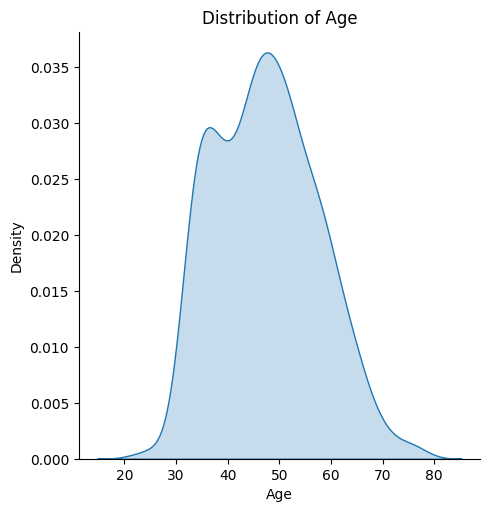

In [ ]:
plt.figure (figsize = (6,6))
sns.displot(data = data['Age'], kind = 'kde', fill = True)
plt.title ("Distribution of Age")
plt.show()

**Distribution of ALB**

<Figure size 600x600 with 0 Axes>

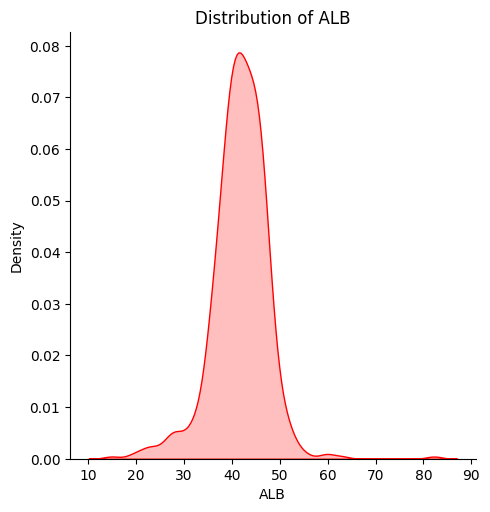

In [ ]:
plt.figure (figsize = (6,6))
sns.displot(data = data['ALB'], kind = 'kde', color = 'red', fill = True)
plt.title ("Distribution of ALB")
plt.show()

In [ ]:
# Identify categorical columns
categorical_columns = data.select_dtypes(include=['object', 'category']).columns
print("Categorical columns:", categorical_columns)

Categorical columns: Index(['Category', 'Sex'], dtype='object')


<Figure size 800x600 with 0 Axes>

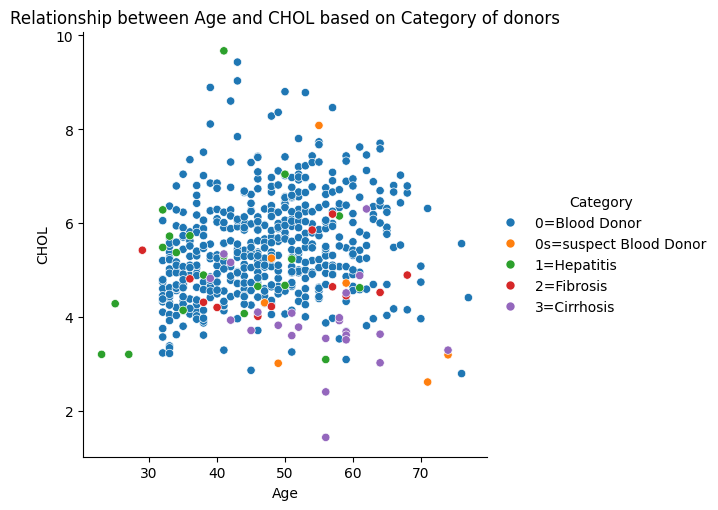

In [ ]:
plt.figure(figsize = (8,6))
sns.relplot(data = data, x = 'Age', y = 'CHOL', hue = 'Category')
plt.title ("Relationship between Age and CHOL based on Category of donors")
plt.show()

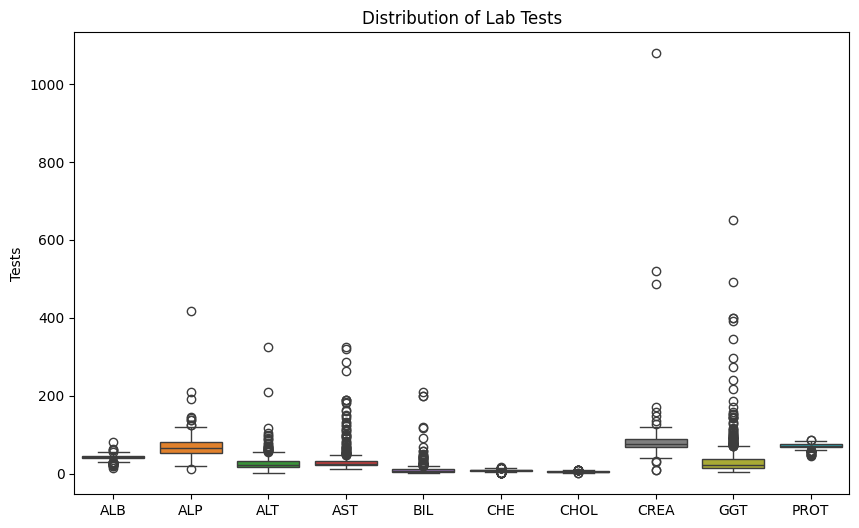

In [ ]:
test_columns = ['ALB', 'ALP', 'ALT', 'AST', 'BIL', 'CHE', 'CHOL', 'CREA', 'GGT', 'PROT']
plt.figure(figsize=(10, 6))
sns.boxplot(data=data[test_columns])
plt.title('Distribution of Lab Tests')
plt.ylabel('Tests')
plt.show()

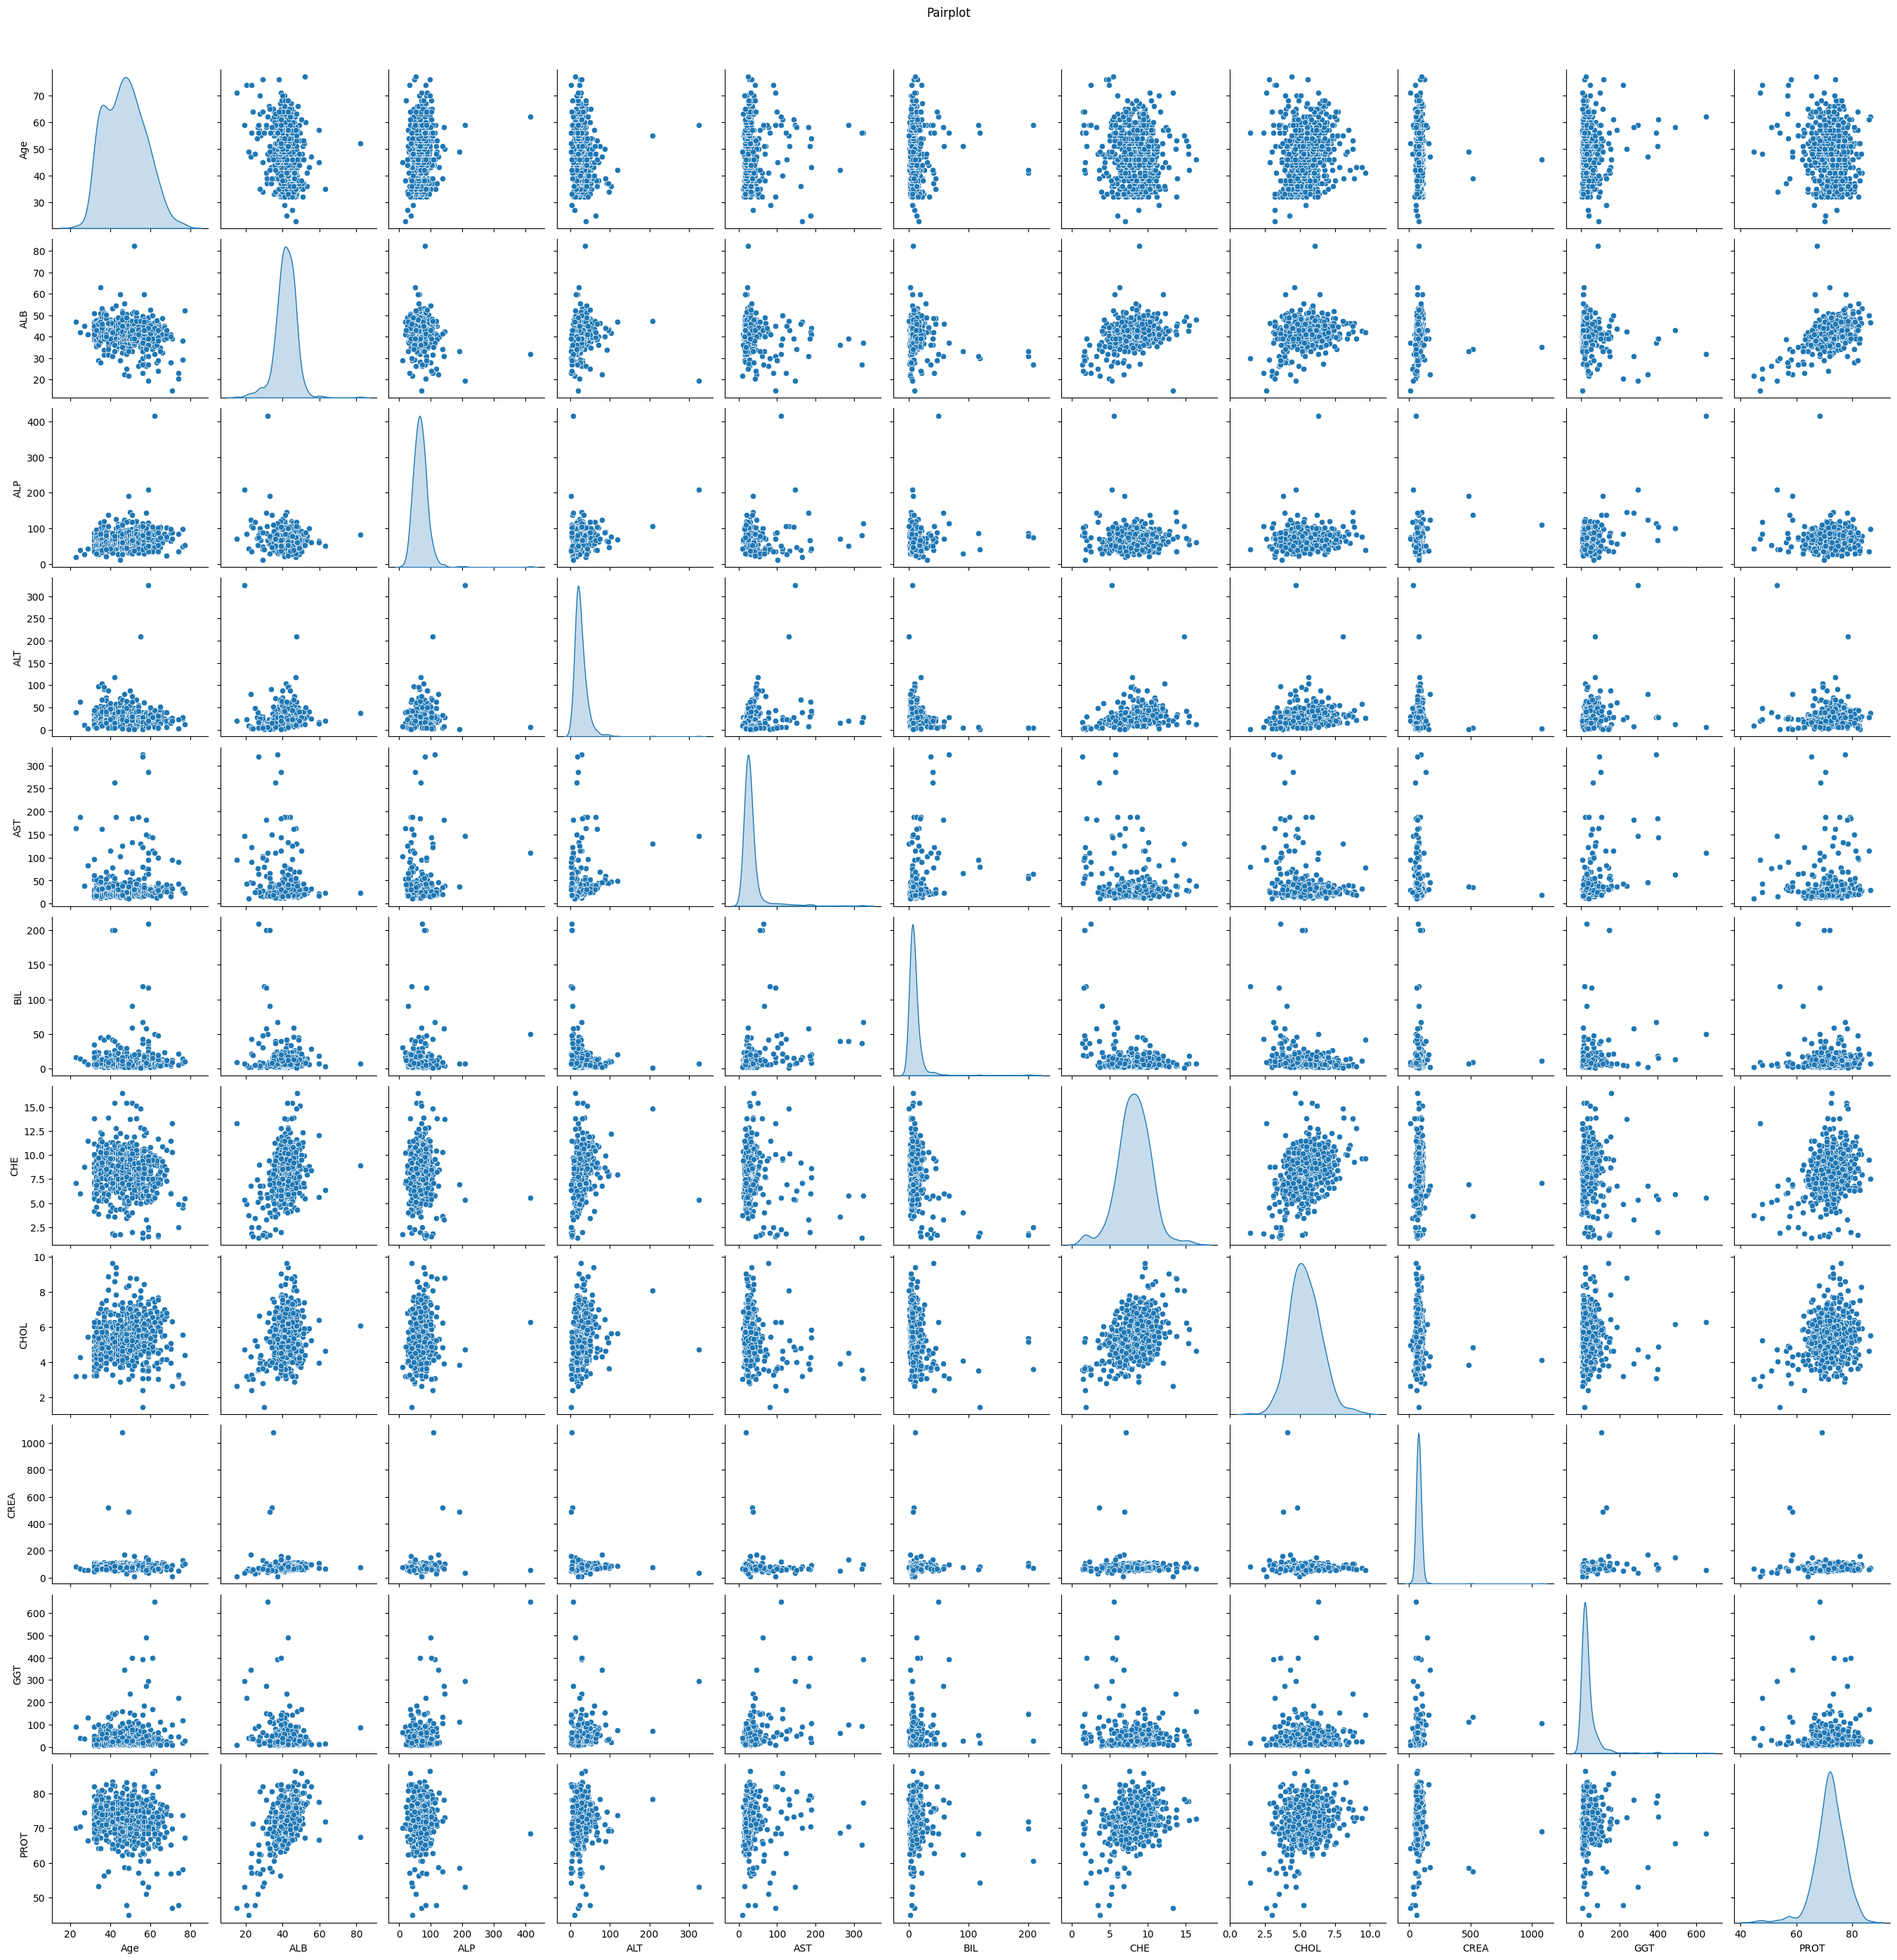

In [ ]:
selected_columns = ['Age', 'ALB', 'ALP', 'ALT', 'AST', 'BIL', 'CHE', 'CHOL', 'CREA', 'GGT', 'PROT']
sns.pairplot(data[selected_columns], diag_kind='kde')
plt.suptitle('Pairplot', y=1.02)
plt.show()

**Data Preprocessing**

LabelEncoder to convert the 'Category' column of a dataset into numeric format suitable for machine learning. It applies one-hot encoding to the 'Sex' column, preventing multicollinearity by dropping the first category. The modifications are verified by displaying the updated dataset structure.

In [ ]:
# Initialize the Label Encoder
label_encoder = LabelEncoder()

# Specify categorical columns for label encoding
categorical_columns = ['Category']

# Initialize the Label Encoder
label_encoder = LabelEncoder()

# Apply Label Encoding to categorical columns
for column in categorical_columns:
    data[column] = label_encoder.fit_transform(data[column])

# Apply One-Hot Encoding to the 'Sex' column
data = pd.get_dummies(data, columns=['Sex'], drop_first=True)

# Check the transformed dataset
print(data)

     Category  Age   ALB    ALP   ALT    AST   BIL    CHE  CHOL   CREA    GGT  \
0           0   32  38.5   52.5   7.7   22.1   7.5   6.93  3.23  106.0   12.1   
1           0   32  38.5   70.3  18.0   24.7   3.9  11.17  4.80   74.0   15.6   
2           0   32  46.9   74.7  36.2   52.6   6.1   8.84  5.20   86.0   33.2   
3           0   32  43.2   52.0  30.6   22.6  18.9   7.33  4.74   80.0   33.8   
4           0   32  39.2   74.1  32.6   24.8   9.6   9.15  4.32   76.0   29.9   
..        ...  ...   ...    ...   ...    ...   ...    ...   ...    ...    ...   
608         4   58  34.0   46.4  15.0  150.0   8.0   6.26  3.98   56.0   49.7   
609         4   59  39.0   51.3  19.6  285.8  40.0   5.77  4.51  136.1  101.1   
610         4   62  32.0  416.6   5.9  110.3  50.0   5.57  6.30   55.7  650.9   
611         4   64  24.0  102.8   2.9   44.4  20.0   1.54  3.02   63.0   35.9   
612         4   64  29.0   87.3   3.5   99.0  48.0   1.66  3.63   66.7   64.2   

     PROT  Sex_m  
0    69.

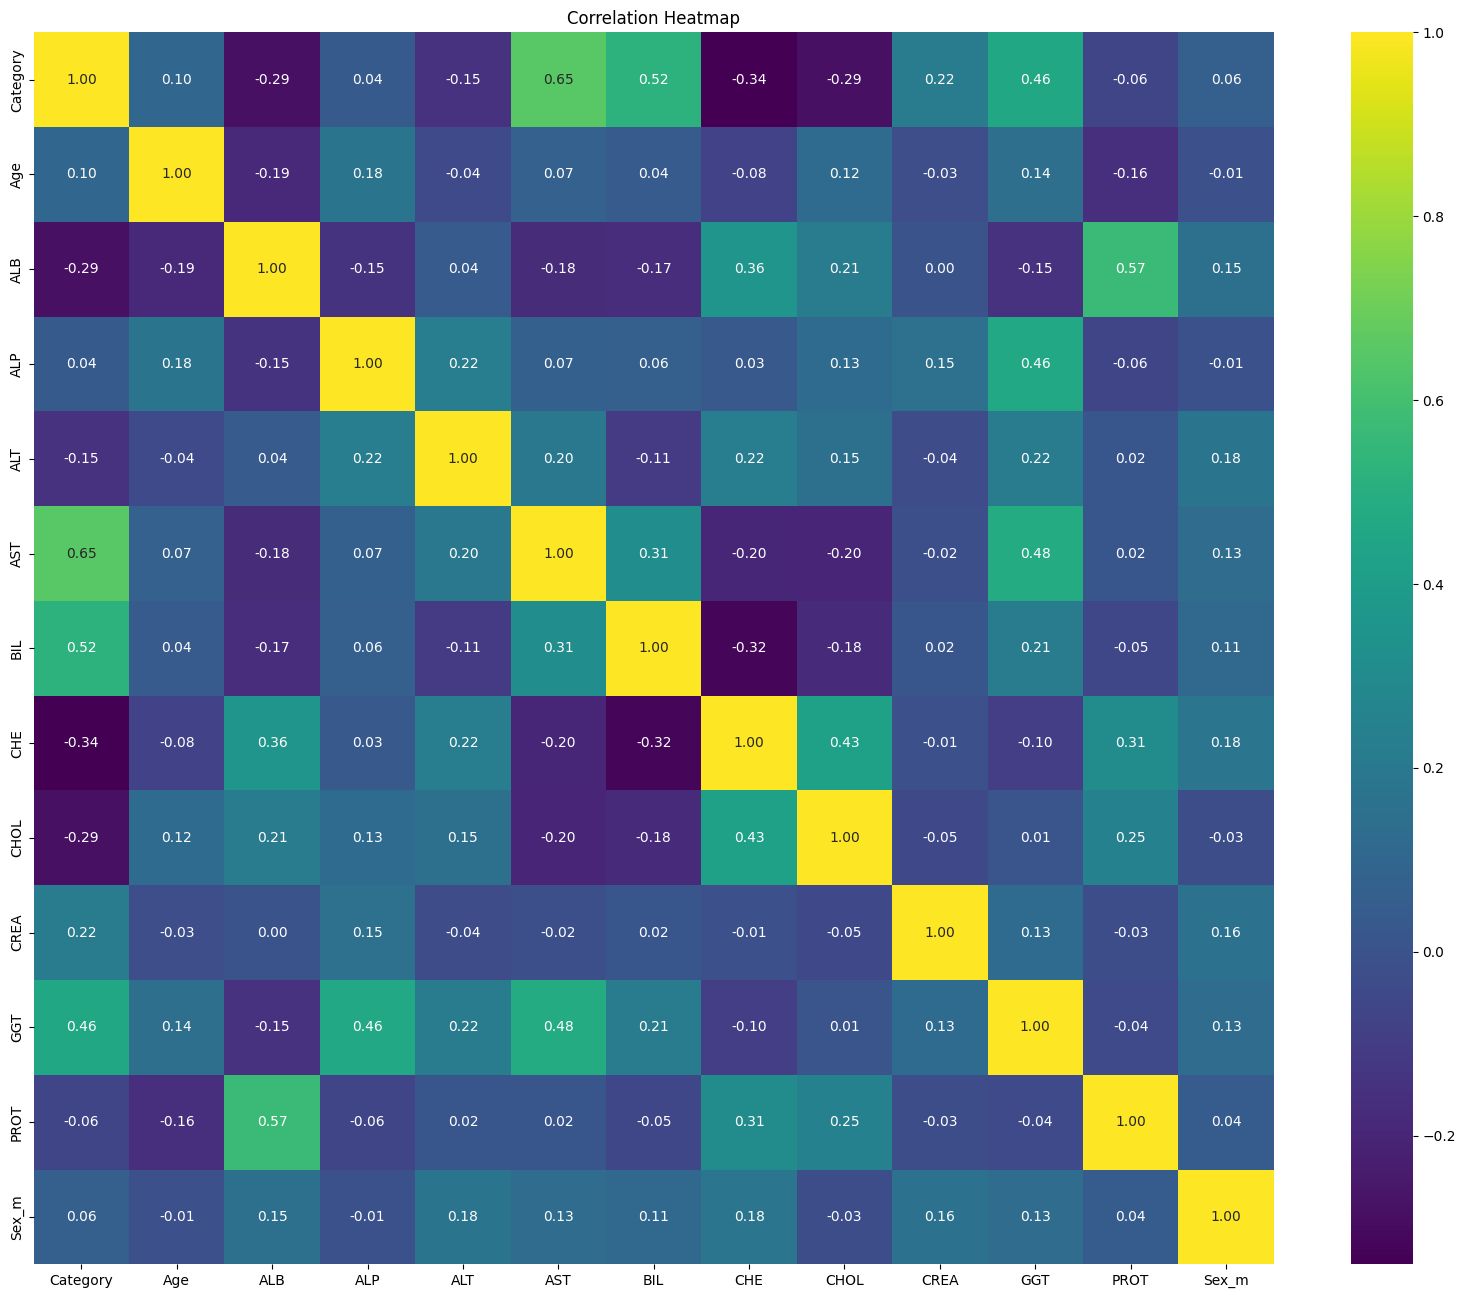

In [ ]:
plt.figure(figsize = (20,16))
sns.heatmap(data = data.corr(), annot = True, cbar = True, cmap = 'viridis', fmt = '.2f')
plt.title("Correlation Heatmap")
plt.show()

**Data Checking**

In [ ]:
# Set the target variable (y) and features (X)
X = data.drop(columns=['Category'])  # Drop the 'Category' column to get features
y = data['Category']  # Set 'Category' as the target variable

# Check the shapes of X and y
print("Features (X):", X.shape)
print("Target (y):", y.shape)

Features (X): (589, 12)
Target (y): (589,)


Class Distribution of the Target Variable 'Category':
Category
0    526
4     24
2     20
3     12
1      7
Name: count, dtype: int64


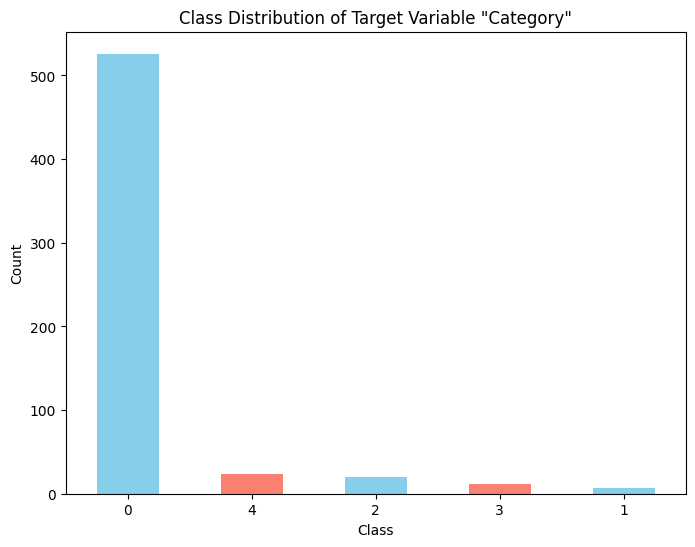

In [ ]:
# Check the class distribution of the target variable (Category)
class_distribution = y.value_counts()

# Display the class distribution
print("Class Distribution of the Target Variable 'Category':")
print(class_distribution)

# Plot class distribution
plt.figure(figsize=(8, 6))
class_distribution.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Class Distribution of Target Variable "Category"')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

**Data Splitting:** The dataset is divided into training and testing sets with an 80-20 split, ensuring both sets have representative samples of the overall dataset.

**Class Distribution Check:** Before addressing imbalances, checks the class distribution in the training set, providing insights into the imbalance.

**SMOTE Application:** To counteract class imbalance, SMOTE (Synthetic Minority Over-sampling Technique) is applied, enhancing minority class representation by generating synthetic samples. This script specifies a lower number of nearest neighbors (k_neighbors=3) to influence the synthetic sample generation.

**Resampling and Scaling:** Post-SMOTE, the changes in class distribution are displayed, and both training and testing data are scaled using MinMaxScaler. This normalization step adjusts feature scales to a common range [0, 1], essential for models sensitive to feature magnitude.

In [ ]:
# Split the data into training and testing sets (80% - 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the training and testing sets
print("Training data shape (X_train, y_train):", X_train.shape, y_train.shape)
print("Testing data shape (X_test, y_test):", X_test.shape, y_test.shape)

# Check the class distribution before SMOTE
print("Class distribution in y_train before SMOTE:")
print(pd.Series(y_train).value_counts())

# Initialize SMOTE with a smaller number of neighbors (k_neighbors)
smote = SMOTE(random_state=42, k_neighbors=3)  # Reduce k_neighbors to 3

# Apply SMOTE to the training data (X_train, y_train)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Display the shape of the resampled data
print(f"Original training set shape: {X_train.shape}, {y_train.shape}")
print(f"Resampled training set shape: {X_train_res.shape}, {y_train_res.shape}")

# Check the class distribution in the resampled data
print("Class distribution in resampled y_train:")
print(pd.Series(y_train_res).value_counts())

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Fit the scaler on the resampled training data and transform both the training and testing data
X_train_scaled = scaler.fit_transform(X_train_res)
X_test_scaled = scaler.transform(X_test)  # Assuming you have already split X_test and y_test

# Display first few rows of the scaled data
print("Scaled X_train data (first 5 rows):")
print(X_train_scaled[:5])

print("Scaled X_test data (first 5 rows):")
print(X_test_scaled[:5])

Training data shape (X_train, y_train): (471, 12) (471,)
Testing data shape (X_test, y_test): (118, 12) (118,)
Class distribution in y_train before SMOTE:
Category
0    427
4     18
2     12
3      9
1      5
Name: count, dtype: int64
Original training set shape: (471, 12), (471,)
Resampled training set shape: (2135, 12), (2135,)
Class distribution in resampled y_train:
Category
0    427
3    427
4    427
1    427
2    427
Name: count, dtype: int64
Scaled X_train data (first 5 rows):
[[0.39622642 0.30609212 0.17369849 0.08199753 0.05608974 0.02222222
  0.49299533 0.63349515 0.07002147 0.03032178 0.53846154 1.        ]
 [0.43396226 0.50817236 0.12015791 0.05733662 0.02724359 0.00555556
  0.42628419 0.43567961 0.08776025 0.02521658 0.59487179 1.        ]
 [0.28301887 0.49777117 0.08290155 0.06935882 0.03237179 0.02979798
  0.60773849 0.73786408 0.07375595 0.05987005 0.91282051 1.        ]
 [0.49056604 0.45319465 0.08536886 0.04130703 0.0125     0.01919192
  0.509006   0.65291262 0.056950

In [ ]:
X_train_res.head(10)

,Age,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT,Sex_m
0,44,35.5,81.7,27.5,29.5,6.4,8.81,6.65,83.0,24.1,68.0,True
1,46,49.1,60.0,19.5,20.5,3.1,7.81,5.02,102.0,20.8,70.2,True
2,38,48.4,44.9,23.4,22.1,7.9,10.53,7.51,87.0,43.2,82.6,True
3,49,45.4,45.9,14.3,15.9,5.8,9.05,6.81,69.0,14.5,78.2,False
4,56,40.2,37.1,30.1,25.1,10.2,9.69,4.93,103.0,20.7,71.9,True
5,35,44.7,83.2,25.3,22.6,3.9,8.02,5.73,68.0,10.8,76.4,False
6,48,50.4,34.6,37.2,28.0,17.3,10.87,6.97,114.0,45.2,72.9,True
7,50,44.3,82.5,38.6,32.9,7.3,8.57,5.95,83.0,23.4,66.6,True
8,44,44.0,84.3,47.4,31.3,4.1,10.28,5.42,105.0,34.2,75.3,True
9,40,41.7,55.3,12.4,23.5,8.2,4.80,5.32,75.0,10.6,73.5,False


**Modeling**

**1.Random Forest Classifier**

The RandomForestClassifier achieved an accuracy of 93.22% in predicting the stages of Hepatitis C. The detailed classification report shows precision, recall, and F1-scores for each class, reflecting varying levels of performance. Class 0 displayed excellent precision and recall, while Class 1 had perfect precision but lower recall. The overall weighted averages for precision, recall, and F1-score are all above 0.90, indicating a strong performance across the board. This highlights the classifier's capability to effectively handle both dominant and minority classes in the dataset.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf = RandomForestClassifier(n_estimators = 100, max_depth = 8, random_state = 42)

In [ ]:
rf.fit(X_train_scaled, y_train_res)

RandomForestClassifier(max_depth=8, random_state=42)

In [ ]:
rf_pred = rf.predict(X_test_scaled)

In [ ]:
rf_accuracy = accuracy_score(y_test, rf_pred)*100
print(f'Accuracy of the Random Forest Classifier is: {rf_accuracy: .2f}%')

Accuracy of the Random Forest Classifier is:  93.22%


In [ ]:
rf_report = classification_report(y_test, rf_pred)
print(rf_report)

              precision    recall  f1-score   support

           0       0.97      0.99      0.98        99
           1       1.00      0.50      0.67         2
           2       0.83      0.62      0.71         8
           3       0.33      0.67      0.44         3
           4       1.00      0.67      0.80         6

    accuracy                           0.93       118
   macro avg       0.83      0.69      0.72       118
weighted avg       0.95      0.93      0.93       118



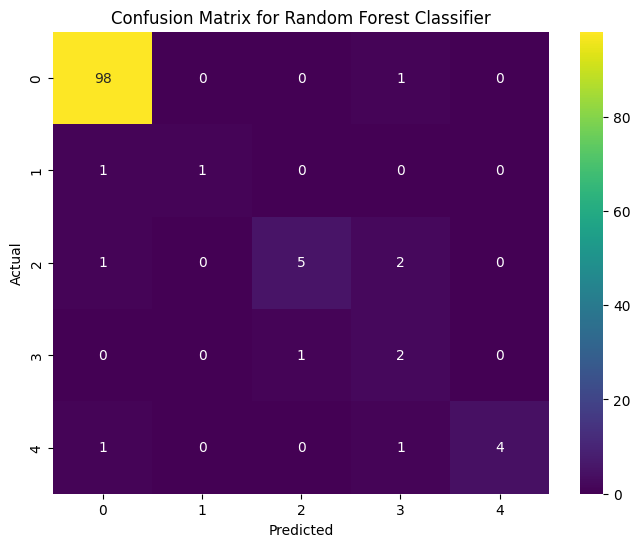

In [ ]:
rf_cm = confusion_matrix(y_test, rf_pred)
plt.figure(figsize = (8,6))
sns.heatmap(data = rf_cm, annot = True, fmt = 'd', cbar = True, cmap = 'viridis')
plt.title ("Confusion Matrix for Random Forest Classifier")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()

**2: Stacking Classifier**

The Stacking Classifier, which leverages a combination of base estimators including a RandomForestClassifier and an SVC, alongside a Logistic Regression as the final estimator, shows a promising accuracy of 93.22%.

Class 0 has exceptional precision and recall, resulting in the highest F1-score of 0.99, indicating highly accurate predictions.

Classes 1 and 4 are small but show perfect precision, suggesting when predictions are made they are highly likely to be correct; however, recall varies, indicating missed cases.

Class 2 has perfect precision but low recall, showing it correctly predicts a few cases but misses several.

Class 3 shows perfect recall but lower precision, suggesting no cases are missed but some are incorrectly labeled as this class.

In [ ]:
# Define base estimators
base_estimators = [
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('svc', SVC(probability=True, random_state=42))
]

stack_clf = StackingClassifier(estimators=base_estimators, final_estimator=LogisticRegression(max_iter=1000, random_state=42))

In [ ]:
stack_clf.fit(X_train_scaled, y_train_res)  # Train the model

StackingClassifier(estimators=[('rf', RandomForestClassifier(random_state=42)),
                               ('svc', SVC(probability=True, random_state=42))],
                   final_estimator=LogisticRegression(max_iter=1000,
                                                      random_state=42))

In [ ]:
stack_pred = stack_clf.predict(X_test_scaled)

In [ ]:
stack_accuracy = accuracy_score(y_test, stack_pred) * 100
print(f'Accuracy of the Stacking Classifier is: {stack_accuracy:.2f}%')

Accuracy of the Stacking Classifier is: 93.22%


In [ ]:
stack_report = classification_report(y_test, stack_pred)
print(stack_report)

              precision    recall  f1-score   support

           0       0.97      1.00      0.99        99
           1       1.00      0.50      0.67         2
           2       1.00      0.38      0.55         8
           3       0.38      1.00      0.55         3
           4       1.00      0.67      0.80         6

    accuracy                           0.93       118
   macro avg       0.87      0.71      0.71       118
weighted avg       0.96      0.93      0.93       118



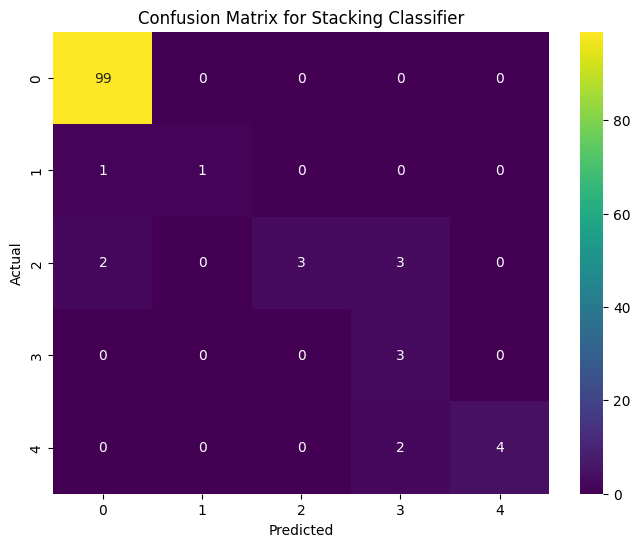

In [ ]:
stack_cm = confusion_matrix(y_test, stack_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(data=stack_cm, annot=True, fmt='d', cbar=True, cmap='viridis')
plt.title("Confusion Matrix for Stacking Classifier")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()

**3: Feed-Forward Neural Network**

The Feed-Forward Neural Network (FNN) for multi-class classification achieves a high accuracy of 92.37%. It features two layers with dropouts to prevent overfitting and uses softmax for output. The model performs well across different classes, with detailed metrics shown in a classification report and a confusion matrix. Training over 50 epochs, its progress is tracked through accuracy plots, confirming effective learning and performance.

In [ ]:
# Define the Feed-Forward Neural Network
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dropout(0.3),  # Dropout for regularization
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(len(set(y_train_res)), activation='softmax')  # Output layer for multi-class classification
])

In [ ]:
  # Compile the model
  model.compile(optimizer=Adam(learning_rate=0.001),
                loss='sparse_categorical_crossentropy',  # Suitable for integer-encoded targets
                metrics=['accuracy'])

In [ ]:
# Train the model
history = model.fit(X_train_scaled, y_train_res,
                    validation_data=(X_test_scaled, y_test),
                    epochs=50,
                    batch_size=64,
                    verbose=1)

# Evaluate the model
loss, accuracy = model.evaluate(X_test_scaled, y_test, verbose=0)
print(f'Accuracy of the Feed-Forward Neural Network: {accuracy * 100:.2f}%')

Epoch 1/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.3618 - loss: 1.5277 - val_accuracy: 0.6525 - val_loss: 1.1685
Epoch 2/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6931 - loss: 1.1007 - val_accuracy: 0.5085 - val_loss: 0.9694
Epoch 3/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7221 - loss: 0.7713 - val_accuracy: 0.6949 - val_loss: 0.8022
Epoch 4/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7827 - loss: 0.6064 - val_accuracy: 0.7627 - val_loss: 0.7036
Epoch 5/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8212 - loss: 0.4960 - val_accuracy: 0.8475 - val_loss: 0.5901
Epoch 6/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8444 - loss: 0.4341 - val_accuracy: 0.8729 - val_loss: 0.5148
Epoch 7/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8556 - loss: 0.3898 - val_accuracy: 0.8983 - val_loss: 0.4007
Epoch 8/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8919 - loss: 0.3340 - val_accuracy: 0.7881 - val_loss:

In [ ]:
# Predictions
y_pred_probs = model.predict(X_test_scaled)
y_pred = y_pred_probs.argmax(axis=1)

1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


In [ ]:
# Classification report
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.97      0.99      0.98        99
           1       1.00      0.50      0.67         2
           2       0.75      0.38      0.50         8
           3       0.29      0.67      0.40         3
           4       1.00      0.83      0.91         6

    accuracy                           0.92       118
   macro avg       0.80      0.67      0.69       118
weighted avg       0.94      0.92      0.92       118



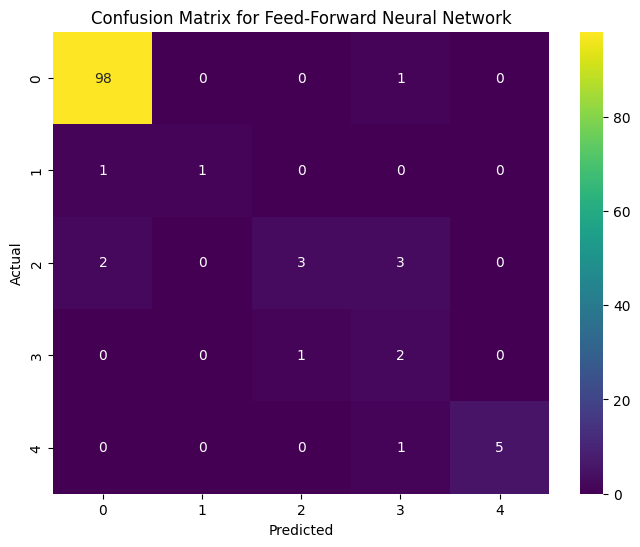

In [ ]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(data=cm, annot=True, fmt='d', cmap='viridis', cbar=True)
plt.title(f"Confusion Matrix for Feed-Forward Neural Network")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()

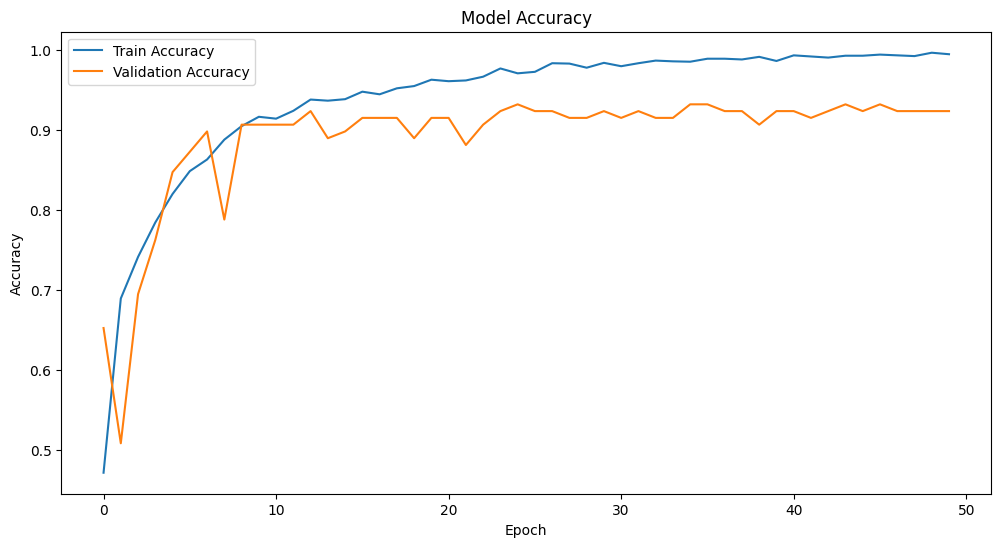

In [ ]:
# Plot training history
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

**4.Bagging Classifier**

The Bagging Classifier achieved an accuracy of 89.83% with mixed performance across different classes. It excelled for Class 0, showing high precision, recall, and F1-score, indicating reliable predictions. However, it struggled with Classes 1 and 3, where both had notably low scores, likely due to small sample sizes. Classes 2 and 4 showed moderate performance. The varied results suggest that while the classifier is effective for well-represented classes, it may require additional strategies such as resampling to improve accuracy for minority classes.

In [ ]:
base_estimator = DecisionTreeClassifier(random_state=42)

bagging = BaggingClassifier(
    base_estimator=base_estimator,
    n_estimators=100,
    max_samples=0.8,
    max_features=0.8,
    random_state=42
)

In [ ]:
bagging.fit(X_train_scaled, y_train_res)

BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=42),
                  max_features=0.8, max_samples=0.8, n_estimators=100,
                  random_state=42)

In [ ]:
bag_pred = bagging.predict(X_test_scaled)

In [ ]:
bag_accuracy = accuracy_score(y_test, bag_pred) * 100
print(f'Accuracy of the Bagging Classifier: {bag_accuracy:.2f}%')

Accuracy of the Bagging Classifier: 89.83%


In [ ]:
bag_report = classification_report(y_test, bag_pred)
print(bag_report)

              precision    recall  f1-score   support

           0       0.96      0.98      0.97        99
           1       0.00      0.00      0.00         2
           2       0.57      0.50      0.53         8
           3       0.20      0.33      0.25         3
           4       0.80      0.67      0.73         6

    accuracy                           0.90       118
   macro avg       0.51      0.50      0.50       118
weighted avg       0.89      0.90      0.89       118



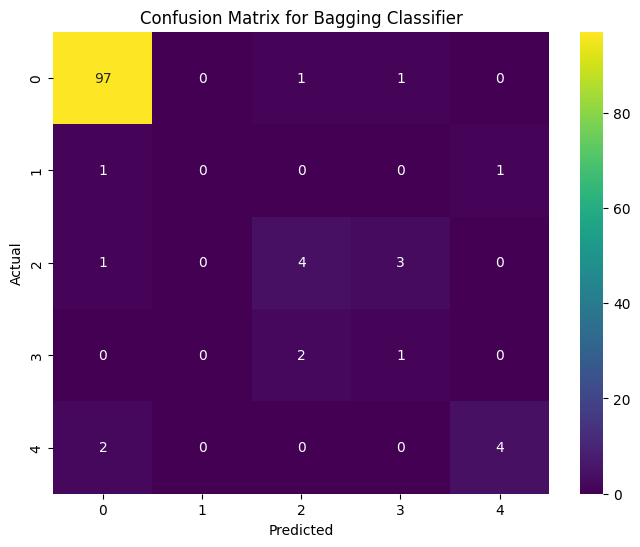

In [ ]:
bag_cm = confusion_matrix(y_test, bag_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(data=bag_cm, annot=True, fmt='d', cmap='viridis', cbar=True)
plt.title("Confusion Matrix for Bagging Classifier")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()

**5: Voting Classifier**

The Voting Classifier, leveraging RandomForest, XGB, and DecisionTree models, achieved an accuracy of 90.68%. It excelled with common classes, showing nearly perfect scores for Class 0, but had mixed results for minority classes, with lower performance especially in Class 3. The high weighted average metrics across all classes highlight the classifier’s overall effectiveness. The confusion matrix provides a detailed look at class-specific performance, suggesting areas for improvement in class prediction consistency.

In [ ]:
clf1 = RandomForestClassifier(n_estimators=200, max_depth=6, random_state=42)
clf2 = XGBClassifier(eval_metric='logloss', random_state=42)
clf3 = DecisionTreeClassifier(max_depth=6, random_state=42)

In [ ]:
voting = VotingClassifier(
    estimators=[
        ('rf', clf1),
        ('xgb', clf2),
        ('dt', clf3)
    ],
    voting='hard'
)

In [ ]:
voting.fit(X_train_scaled, y_train_res)

VotingClassifier(estimators=[('rf',
                              RandomForestClassifier(max_depth=6,
                                                     n_estimators=200,
                                                     random_state=42)),
                             ('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None,
                                            enable_categorical=False,
                                            eval_metric='logloss', gamma=None,
                                            gpu_id=None, importance_type=None,
                                            interaction_constraints=None,
                                            learning...
                                            max_delta_step=None, max_depth=None,
  

In [ ]:
voting_pred = voting.predict(X_test_scaled)

In [ ]:
voting_accuracy = accuracy_score(y_test, voting_pred) * 100
print(f'Accuracy of the Voting Classifier: {voting_accuracy:.2f}%')

Accuracy of the Voting Classifier: 90.68%


In [ ]:
voting_report = classification_report(y_test, voting_pred)
print(voting_report)

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        99
           1       1.00      0.50      0.67         2
           2       0.75      0.38      0.50         8
           3       0.20      0.67      0.31         3
           4       1.00      0.67      0.80         6

    accuracy                           0.91       118
   macro avg       0.79      0.64      0.65       118
weighted avg       0.95      0.91      0.92       118



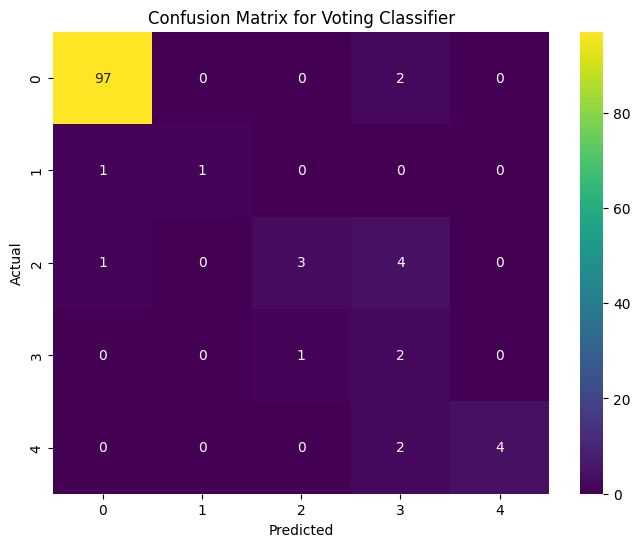

In [ ]:
voting_cm = confusion_matrix(y_test, voting_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(data=voting_cm, annot=True, fmt='d', cmap='viridis', cbar=True)
plt.title("Confusion Matrix for Voting Classifier")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()

**Model Comparisions**

The predictive accuracy of the Stacking Classifier (93.22%) is considerably higher than FNN Classifier (92.37%), Bagging Classifier (89.83%) and Voting Classifier (90.68%). However, Stacking and Random Forest Classifier obtained the same accuracy, the Stacking Classifier model provided better predictive performance across classes of target variable. This reflects that **the Stacking Classifier is the best-fitted model for the prediction of stages of HCV based on clinical parameters.**

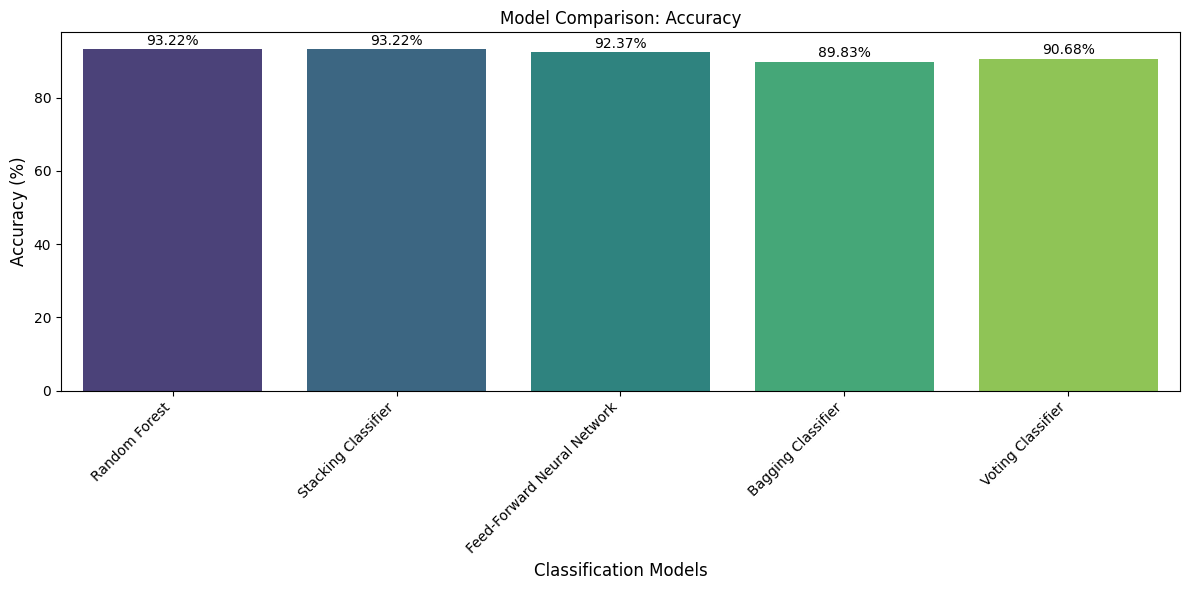

In [ ]:
# Ensure accuracy for Feed-Forward Neural Network is converted to a scalar value
ff_accuracy = accuracy * 100

# Dictionary of models and their accuracies
models = {
    'Random Forest': rf_accuracy,
    'Stacking Classifier': stack_accuracy,
    'Feed-Forward Neural Network': ff_accuracy,  # Use ff_accuracy here
    'Bagging Classifier': bag_accuracy,
    'Voting Classifier': voting_accuracy,
}

# Find the best model and its accuracy
best_model = max(models, key=models.get)
best_accuracy = models[best_model]

#print(f"The best-fitted model is: {best_model} with an accuracy of {best_accuracy:.2f}%")

# Plotting the accuracies
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=list(models.keys()), y=list(models.values()), palette='viridis')

plt.title('Model Comparison: Accuracy', fontsize=12)
plt.xlabel('Classification Models', fontsize=12)
plt.ylabel('Accuracy (%)', fontsize=12)

# Adding text labels above the bars
for i, v in enumerate(models.values()):
    ax.text(i, v + 0.5, f'{v:.2f}%', ha='center', va='bottom', fontsize=10, color='black')

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**Model deployment**

The deployment involves a text-based user interface (UI) for predicting the stages of Hepatitis C Virus (HCV) using a trained Stacking Classifier model. The system utilizes a MinMaxScaler for input scaling and provides predictions based on clinical and biochemical parameters.

In [ ]:
import pickle
pickle.dump(stack_clf, open("stack_clf.pkl", 'wb'))
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train_res)

# Save the updated scaler
with open("scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)

In [ ]:
stack_clf = pickle.load(open("stack_clf.pkl", 'rb'))
scaler = pickle.load(open("scaler.pkl", 'rb'))


class_labels = {
    0: 'Blood Donor',
    1: 'Suspect Blood Donor',
    2: 'Hepatitis',
    3: 'Fibrosis',
    4: 'Cirrhosis'
}

def predict_hcv_stage(input_data):

    input_array = np.array(input_data).reshape(1, -1)

    input_scaled = scaler.transform(input_array)

    prediction = stack_clf.predict(input_scaled)
    return class_labels[prediction[0]]

def text_based_ui():
    print("Hepatitis C Virus (HCV) Stage Prediction")
    print("Provide the following inputs:")

    while True:
        try:

            age = float(input("Age: "))
            sex = int(input("Sex (1 for Male, 0 for Female): "))
            alb = float(input("ALB: "))
            alp = float(input("ALP: "))
            alt = float(input("ALT: "))
            ast = float(input("AST: "))
            bil = float(input("BIL: "))
            che = float(input("CHE: "))
            chol = float(input("CHOL: "))
            crea = float(input("CREA: "))
            ggt = float(input("GGT: "))
            prot = float(input("PROT: "))


            input_features = [age, sex, alb, alp, alt, ast, bil, che, chol, crea, ggt, prot]


            result = predict_hcv_stage(input_features)
            print(f"Predicted Stage: {result}")


            cont = input("Do you want to predict another case? (yes/no): ").strip().lower()
            if cont != 'yes':
                break
        except Exception as e:
            print(f"Error: {e}. Please provide valid inputs.")


if __name__ == "__main__":
    text_based_ui()

Hepatitis C Virus (HCV) Stage Prediction
Provide the following inputs:
Age: 32
Sex (1 for Male, 0 for Female): 0
ALB: 36.3
ALP: 52.6
ALT: 7.7
AST: 22.1
BIL: 6.93
CHE: 3.23
CHOL: 3.23
CREA: 106
GGT: 12.1
PROT: 23
Predicted Stage: Cirrhosis
Do you want to predict another case? (yes/no): No
